In [35]:
import cv2 as cv
import numpy as np    

def pieceLinear(img,A,B):
    size = len(A)
    x = []
    y = []

    for i in range(size):
        # in numpy instead of using 'and' we use the logical_and function
        cond = np.logical_and(A[i][0] <= img, A[i][1] > img)
        temp = img[cond]
        t = B[i][0] * temp + B[i][1]
        img[cond] = t
        
        y.append(t.flatten())
        x.append(temp.flatten())
        # np.where(img>=A[i][0] and img < A[i][1],B[i][0]*img + B[i][1],img)

    x = [element for sub in x for element in sub]
    y = [element for sub in y for element in sub]
    return (img,x,y)
        

In [36]:
#greyscale function 
def greyscale(img):
    # (w,h) = img.shape[0:2]
    # for i in range(w):
    #     for j in range(h):
    #         (r,g,b) = img[i,j]
    #         img[i,j] = 0.21*r + 0.72*g + 0.07*b
    blue = img[:,:,2]
    red = img[:,:,0]
    green = img[:,:,1]

    blue = 0.07*blue
    green = 0.72*green
    red = 0.21*red

    grey = blue+green+red
    img = (np.stack((grey,grey,grey),axis=2)).astype(np.uint8) #stacking the channels together
    return img

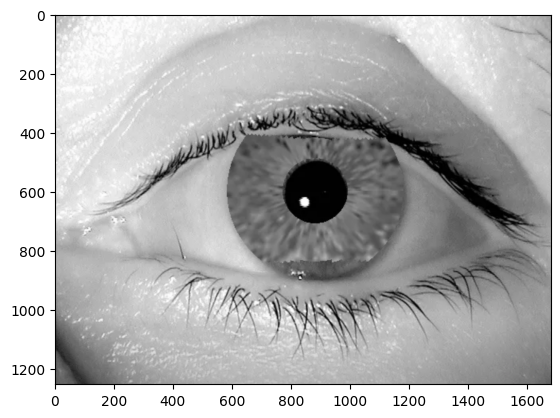

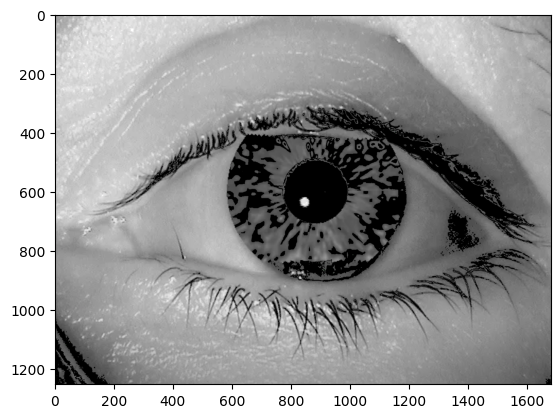

In [37]:
import os
import matplotlib.pyplot as plt
img1 = cv.imread("../images/iris1.png")
plt.figure()
plt.imshow(img1)

A1 = np.array([(0.0,0.2),(0.2,0.3),(0.3,0.4),(0.4,1)])
B1 = np.array([(0.0,0.0),(-1,0.7),(0.0,0.0),(1.0,-0.1)])

# since the intensities are between 0 and 1 => divide image by 255
img1 = img1/255
(result1,x1,y1) = pieceLinear(img1,A1,B1)

plt.figure()
plt.imshow(result1)

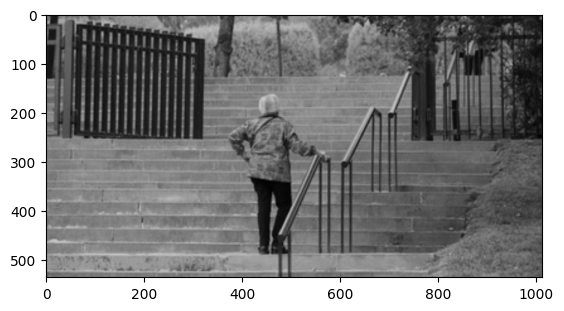

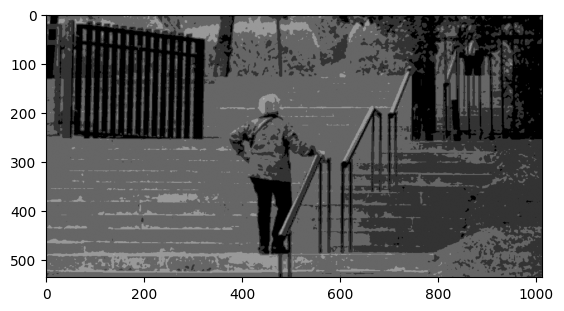

In [38]:
img2 = cv.imread("../images/stairs2.png")
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
img2 = greyscale(img2)
plt.figure()
plt.imshow(img2)

A2 = np.array([(0.0,0.2),(0.2,0.4),(0.4,0.6),(0.6,0.8),(0.8,1.0)])
B2 = np.array([(0.0,0.0),(0.0,0.2),(0.0,0.4),(0.0,0.6),(0.0,0.8)])
# since the intensities are between 0 and 1 => divide image by 255
img2 = img2/255
(result2,x2,y2) = pieceLinear(img2,A2,B2)
plt.figure()
plt.imshow(result2)

Text(0, 0.5, 'Transformed intensities')

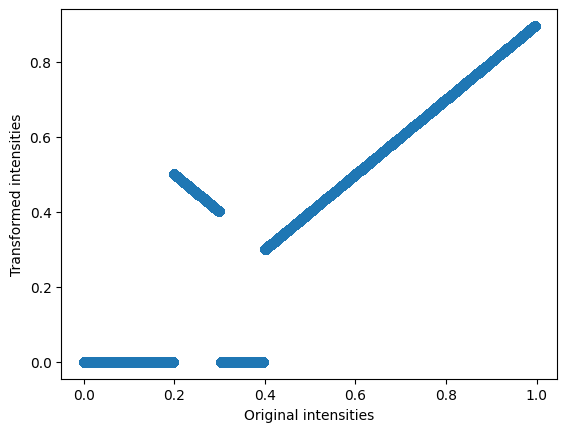

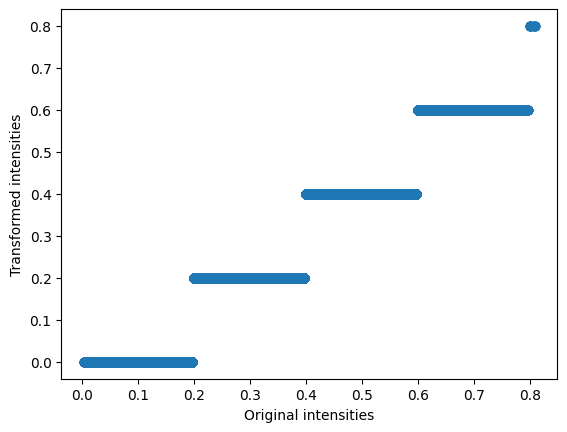

In [41]:
#plotting functions
plt.figure()
plt.scatter(x1,y1)
plt.xlabel("Original intensities")
plt.ylabel("Transformed intensities")
plt.figure()
plt.scatter(x2,y2)
plt.xlabel("Original intensities")
plt.ylabel("Transformed intensities")